# Hydrogen Atom Electrons affected by Quantum Walk

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import imageio,os
%matplotlib inline
from numpy import pi

In [2]:
QrC1 = QuantumRegister(1, 'coin1')
QrS1= QuantumRegister(2, 'space1')
Help1=QuantumRegister(1,'help1')
QrC2 = QuantumRegister(1, 'coin2')
QrS2= QuantumRegister(2, 'space2')
Help2=QuantumRegister(1,'help2')

Cr = ClassicalRegister(4)

used H as coin 

{'0000': 524, '1111': 500}


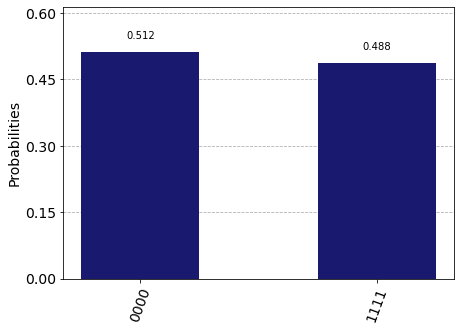

{'0000': 118, '0101': 125, '1010': 134, '1111': 116, '1110': 128, '1011': 142, '0100': 122, '0001': 139}


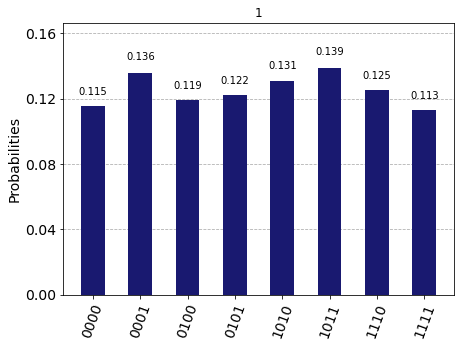

{'1010': 69, '1000': 71, '0101': 63, '1111': 139, '1110': 64, '1001': 57, '0001': 54, '0000': 133, '1101': 64, '0100': 67, '0110': 52, '0111': 59, '1011': 69, '0010': 63}


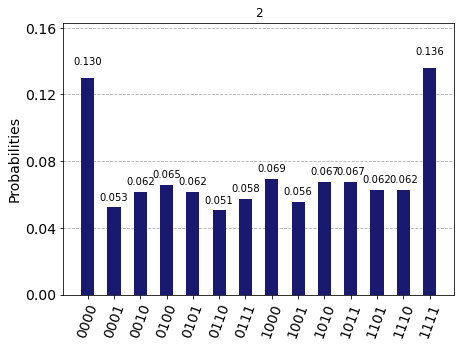

{'0101': 78, '1011': 82, '0001': 83, '0111': 48, '0010': 49, '0110': 41, '1000': 39, '1001': 53, '0000': 83, '1110': 85, '0011': 30, '1010': 103, '0100': 73, '1111': 86, '1100': 48, '1101': 43}


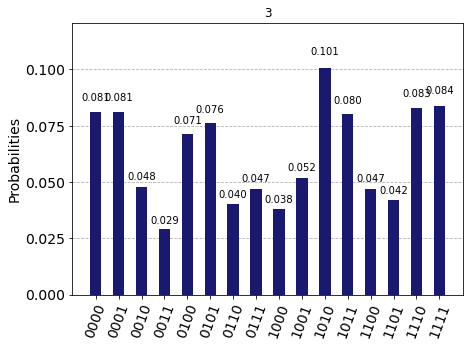

{'1110': 56, '0101': 102, '0110': 107, '1001': 82, '0100': 50, '1000': 71, '1101': 76, '0111': 59, '1010': 98, '0001': 60, '1011': 63, '0011': 27, '1111': 48, '0000': 38, '0010': 63, '1100': 24}


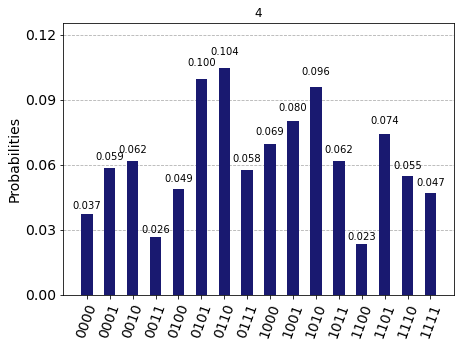

{'1101': 61, '0110': 52, '1111': 84, '0100': 64, '1100': 63, '0010': 59, '0111': 67, '0000': 100, '1011': 73, '1001': 49, '1110': 60, '0011': 74, '0001': 59, '1000': 62, '1010': 44, '0101': 53}


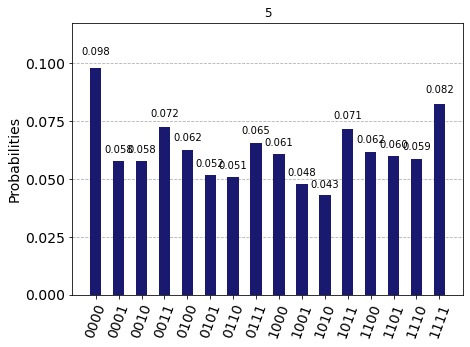

{'1001': 56, '1100': 66, '0100': 74, '1000': 66, '0110': 45, '0000': 94, '1111': 89, '1110': 52, '1101': 43, '0010': 44, '1010': 72, '1011': 62, '0001': 65, '0011': 70, '0101': 67, '0111': 59}


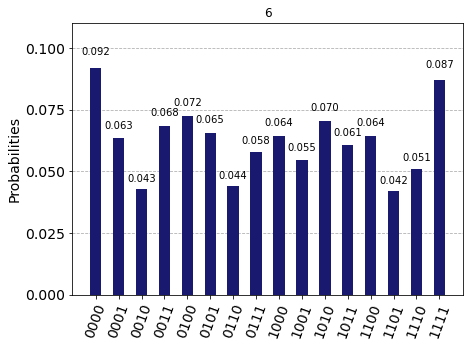

{'0001': 81, '0100': 70, '1100': 53, '1110': 73, '1101': 55, '0101': 64, '1011': 75, '0000': 94, '1001': 46, '0110': 46, '1000': 46, '1111': 109, '1010': 53, '0010': 43, '0111': 62, '0011': 54}


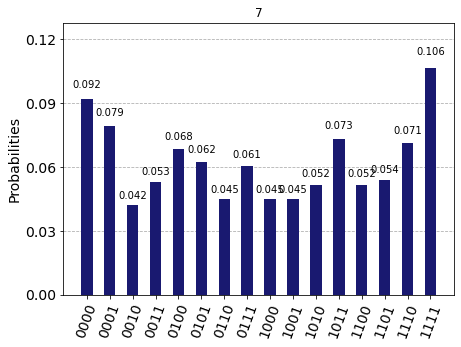

{'1111': 101, '0011': 43, '0001': 82, '1000': 49, '1010': 67, '0010': 50, '0111': 47, '1001': 60, '1110': 66, '0101': 60, '1011': 74, '0110': 52, '0100': 95, '1101': 49, '0000': 80, '1100': 49}


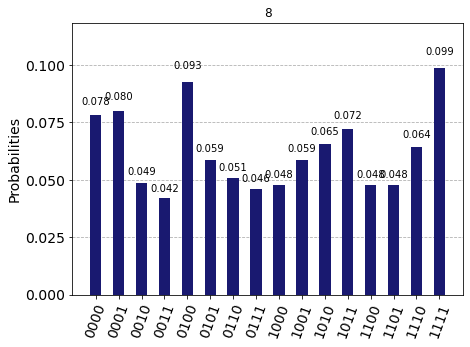

{'1000': 61, '0000': 52, '0110': 69, '0001': 71, '0101': 71, '1010': 75, '1001': 75, '1110': 79, '1011': 80, '0010': 51, '0111': 60, '1101': 66, '1111': 77, '0011': 42, '0100': 62, '1100': 33}


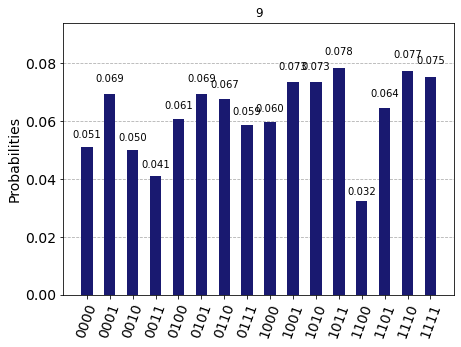

{'1001': 54, '0101': 70, '0110': 70, '1111': 54, '0011': 62, '1010': 78, '0001': 66, '1000': 71, '0100': 64, '0000': 73, '1110': 49, '0010': 56, '1011': 73, '1101': 61, '1100': 58, '0111': 65}


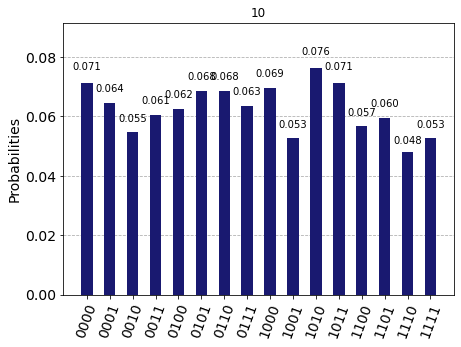

{'1011': 64, '1111': 73, '0000': 73, '0110': 56, '0101': 59, '0100': 63, '0001': 43, '1001': 64, '0011': 69, '0111': 67, '1100': 68, '1110': 67, '1000': 62, '1010': 77, '1101': 64, '0010': 55}


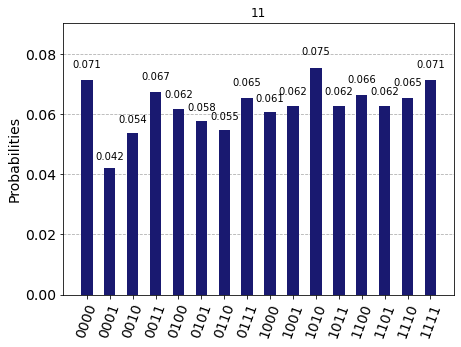

{'0100': 58, '1101': 62, '1001': 57, '1011': 69, '1100': 73, '1000': 76, '0000': 63, '0011': 71, '0010': 66, '1111': 62, '1010': 56, '1110': 64, '0110': 75, '0101': 47, '0001': 68, '0111': 57}


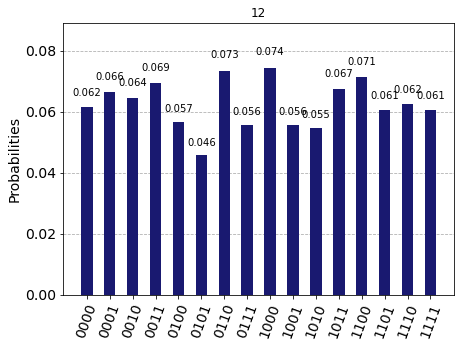

{'1110': 63, '1011': 58, '0011': 62, '0001': 69, '0000': 87, '0100': 71, '1100': 67, '1101': 61, '1000': 78, '1001': 46, '1010': 62, '0110': 52, '1111': 70, '0101': 52, '0010': 52, '0111': 74}


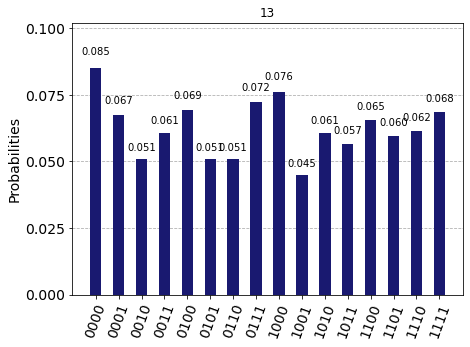

{'1010': 68, '1011': 63, '1111': 71, '1000': 55, '0000': 70, '0100': 65, '1001': 62, '0011': 68, '0101': 59, '0001': 60, '0111': 52, '0010': 69, '0110': 82, '1100': 58, '1110': 61, '1101': 61}


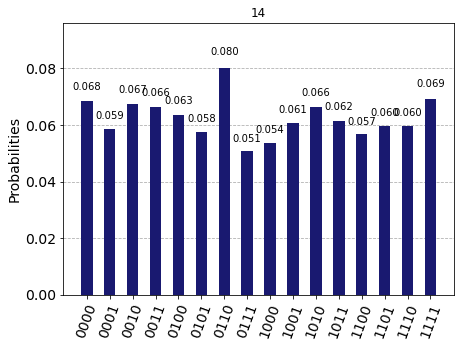

In [3]:
from qiskit.circuit.library.standard_gates import HGate
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    for i in range(a):
        #coin
        qc.barrier()
        qc.h((0,4))
        qc.barrier()

        #situation 000
        qc.x((0,1,2,4,5,6))
        qc.mcx([0,1,2],3)
        qc.mcx([4,5,6],7)
        qc.x((0,1,2,4,5,6))
        qc.cx(3,1)
        qc.cx(7,5)
        qc.reset((3,7))
        qc.barrier()
        #situation 111
        qc.mcx([0,1,2],3)
        qc.mcx([4,5,6],7)
        qc.cx(3,1)
        qc.cx(7,5)
        qc.reset((3,7))
        qc.barrier()
        #adder and decreaser(walker)
        qc.ccx(0,1,2)
        qc.cx(0,1)
        qc.ccx(4,5,6)
        qc.cx(4,5)
        qc.x((0,4))
        qc.cx(0,1)
        qc.ccx(0,1,2)
        qc.cx(4,5)
        qc.ccx(4,5,6)

    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(5,2)
    qc.measure(6,3)
    from qiskit.visualization import plot_histogram
    %matplotlib inline
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    print(job.result().get_counts())

    display(plot_histogram(job.result().get_counts(), color='midnightblue', title= a 
                    ))

use modify H as coin

C:\Users\willy\AppData\Local\Temp/ipykernel_15840/3112512560.py:10: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])


{'1111': 527, '0000': 497}


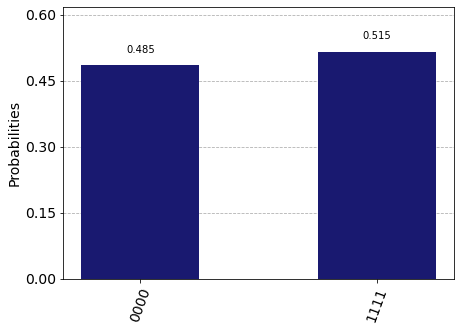

{'0100': 125, '0101': 132, '0000': 135, '1010': 119, '1111': 117, '1110': 124, '0001': 145, '1011': 127}


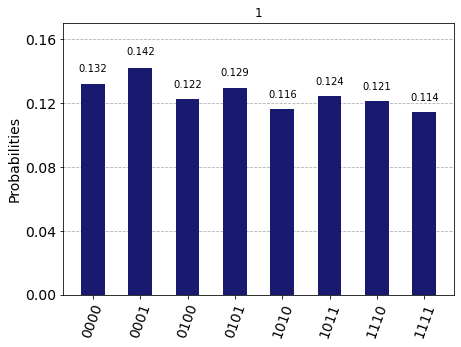

{'1011': 59, '1110': 69, '0110': 65, '1001': 56, '1101': 68, '0000': 120, '0111': 68, '0010': 72, '1111': 108, '0001': 70, '0100': 64, '1000': 73, '1010': 61, '0101': 71}


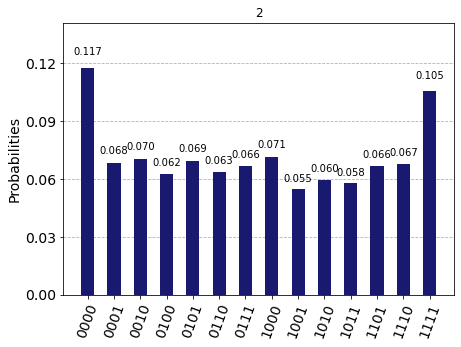

{'0111': 44, '1110': 86, '0000': 77, '0100': 81, '1001': 51, '1000': 46, '0101': 81, '1111': 76, '1010': 82, '1011': 85, '1101': 43, '0110': 43, '0001': 90, '1100': 39, '0010': 44, '0011': 56}


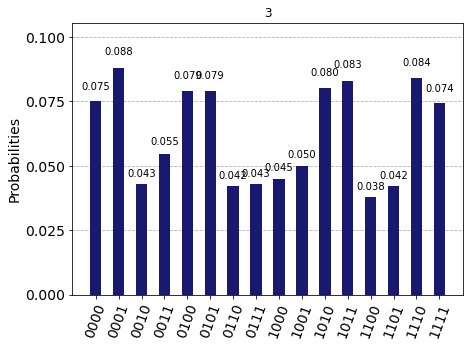

{'1001': 110, '1101': 56, '0101': 112, '0011': 28, '0110': 86, '0001': 64, '1010': 95, '0010': 69, '1011': 66, '0111': 61, '0100': 53, '1000': 54, '1111': 26, '1110': 59, '1100': 36, '0000': 49}


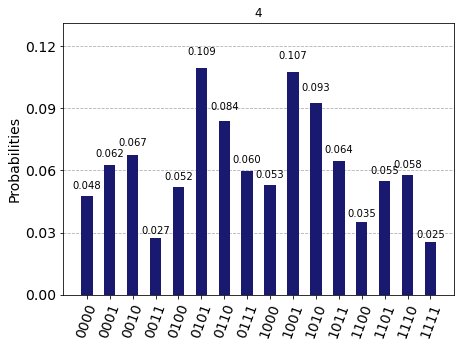

{'1101': 52, '0100': 64, '1010': 50, '0010': 60, '0101': 45, '0110': 48, '1110': 68, '0000': 84, '1001': 49, '1111': 102, '1100': 92, '0111': 52, '0011': 70, '1000': 62, '1011': 67, '0001': 59}


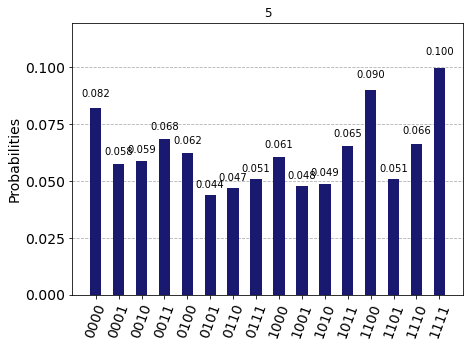

{'0000': 76, '1011': 69, '1111': 78, '0011': 49, '1101': 66, '0010': 61, '0001': 80, '1110': 82, '0100': 73, '1100': 66, '1000': 56, '1001': 47, '1010': 60, '0101': 50, '0110': 68, '0111': 43}


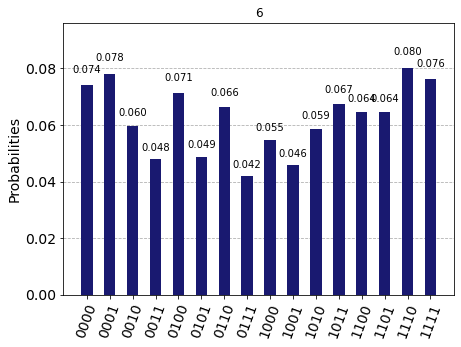

{'0001': 70, '0000': 105, '1000': 58, '1101': 48, '1111': 95, '1110': 85, '1001': 46, '0011': 54, '0010': 60, '0111': 50, '1011': 69, '1100': 41, '0110': 47, '0101': 66, '0100': 76, '1010': 54}


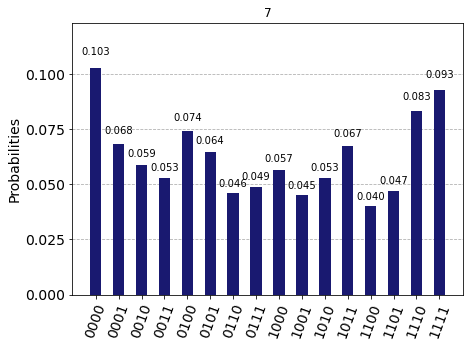

{'1010': 59, '0110': 57, '0001': 67, '1011': 84, '1111': 98, '1000': 52, '1100': 42, '1101': 46, '0111': 46, '0000': 82, '1110': 77, '1001': 68, '0101': 74, '0010': 48, '0011': 50, '0100': 74}


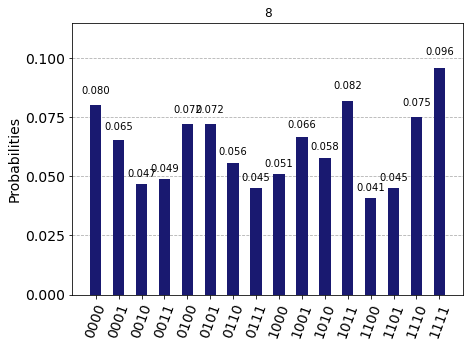

{'1011': 72, '1110': 56, '0111': 74, '0110': 77, '1111': 68, '0010': 60, '0100': 61, '0000': 52, '0011': 43, '1010': 73, '1101': 70, '0001': 64, '0101': 71, '1001': 79, '1000': 66, '1100': 38}


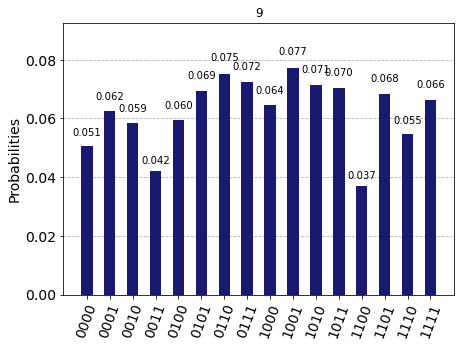

{'0111': 47, '0010': 64, '1011': 65, '0001': 67, '1101': 54, '1100': 63, '1000': 69, '0110': 61, '0100': 74, '1110': 59, '1111': 74, '1001': 63, '0000': 51, '0101': 77, '0011': 64, '1010': 72}


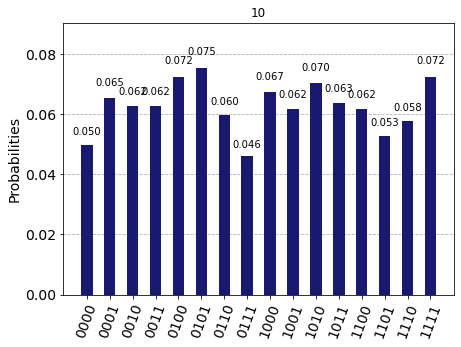

{'0011': 74, '0001': 61, '1110': 59, '0010': 54, '0111': 71, '1111': 71, '0100': 58, '1001': 61, '0110': 58, '0101': 70, '1011': 48, '1000': 69, '0000': 65, '1101': 72, '1100': 57, '1010': 76}


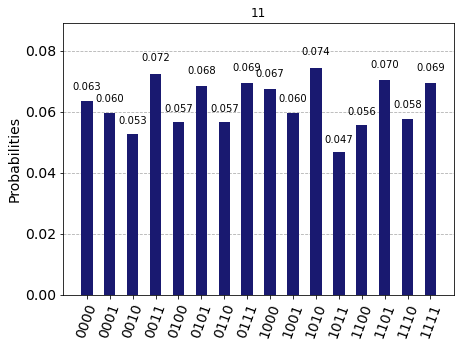

{'1010': 52, '0110': 67, '1101': 58, '0001': 69, '0010': 56, '0111': 52, '0000': 64, '1111': 80, '0011': 84, '1000': 62, '1001': 72, '1011': 63, '1110': 64, '1100': 70, '0100': 56, '0101': 55}


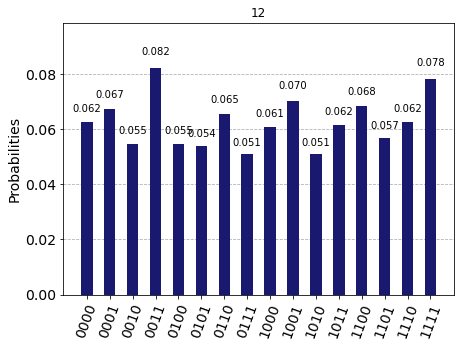

{'0000': 67, '1111': 77, '1011': 75, '1100': 63, '1110': 56, '1000': 63, '0001': 62, '0110': 49, '1001': 63, '1101': 65, '1010': 54, '0010': 57, '0011': 78, '0111': 54, '0101': 58, '0100': 83}


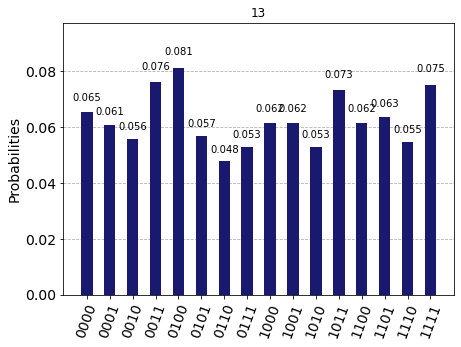

{'0110': 60, '1101': 55, '1000': 62, '1110': 64, '1001': 66, '0111': 47, '0010': 75, '1011': 65, '0101': 67, '0011': 66, '0000': 81, '1111': 76, '1100': 44, '0100': 65, '1010': 68, '0001': 63}


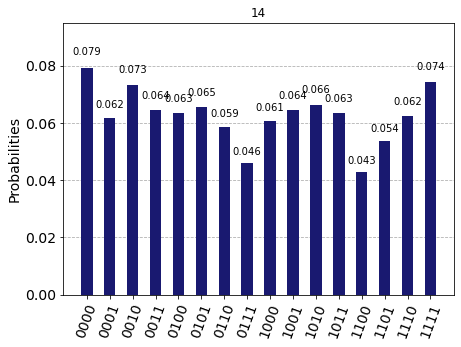

In [3]:
from qiskit.circuit.library.standard_gates import HGate
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])
    qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC2[0])
    for i in range(a):
        #coin
        qc.barrier()
        qc.h((0,4))
        qc.barrier()

        #situation 000
        qc.x((0,1,2,4,5,6))
        qc.mcx([0,1,2],3)
        qc.mcx([4,5,6],7)
        qc.x((0,1,2,4,5,6))
        qc.cx(3,1)
        qc.cx(7,5)
        qc.reset((3,7))
        qc.barrier()
        #situation 111
        qc.mcx([0,1,2],3)
        qc.mcx([4,5,6],7)
        qc.cx(3,1)
        qc.cx(7,5)
        qc.reset((3,7))
        qc.barrier()
        #adder and decreaser(walker)
        qc.ccx(0,1,2)
        qc.cx(0,1)
        qc.ccx(4,5,6)
        qc.cx(4,5)
        qc.x((0,4))
        qc.cx(0,1)
        qc.ccx(0,1,2)
        qc.cx(4,5)
        qc.ccx(4,5,6)

    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(5,2)
    qc.measure(6,3)
    from qiskit.visualization import plot_histogram
    %matplotlib inline
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    print(job.result().get_counts())

    display(plot_histogram(job.result().get_counts(), color='midnightblue', title= a 
                    ))

s gate

In [3]:
from qiskit.circuit.library.standard_gates import SGate,SdgGate
c2s_gate = SGate().control(1)
c3s_gate  = SGate().control(2)

c2sd_gate = SdgGate().control(1)
c3sd_gate  = SdgGate().control(2)


{'0000': 531, '1111': 493}


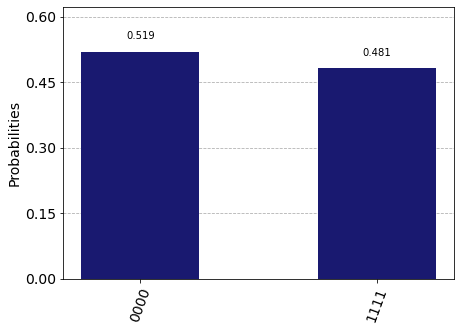

{'1010': 122, '0001': 118, '0101': 133, '1111': 123, '0100': 131, '0000': 139, '1011': 127, '1110': 131}


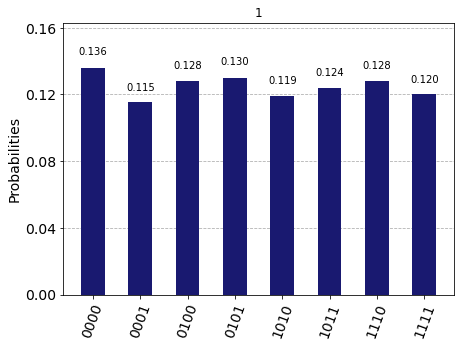

{'0000': 41, '1010': 310, '0100': 103, '0101': 275, '1011': 97, '1110': 91, '1111': 32, '0001': 75}


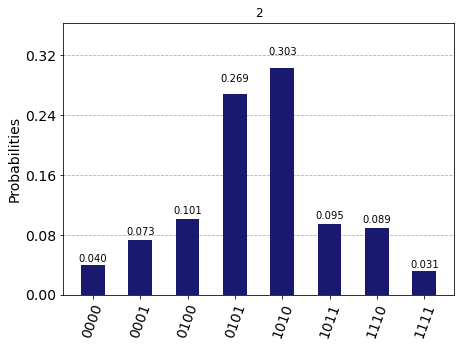

{'0100': 59, '1010': 409, '0101': 390, '1011': 45, '0001': 59, '1110': 48, '1111': 8, '0000': 6}


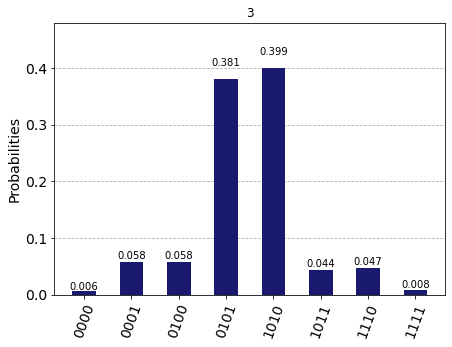

{'1010': 451, '0101': 446, '0001': 26, '0100': 36, '1011': 37, '0000': 1, '1110': 26, '1111': 1}


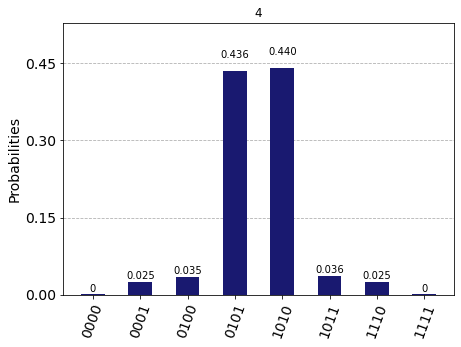

{'0101': 452, '1010': 506, '0100': 15, '1011': 12, '1110': 24, '0001': 15}


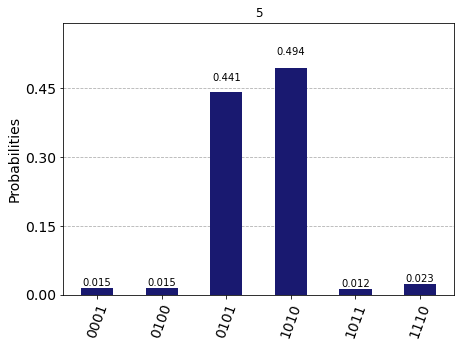

{'1010': 501, '0101': 496, '0001': 7, '1011': 7, '1110': 7, '0100': 6}


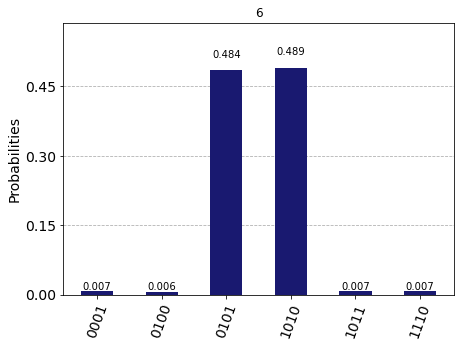

{'0101': 519, '1010': 496, '1011': 3, '0001': 3, '0100': 2, '1110': 1}


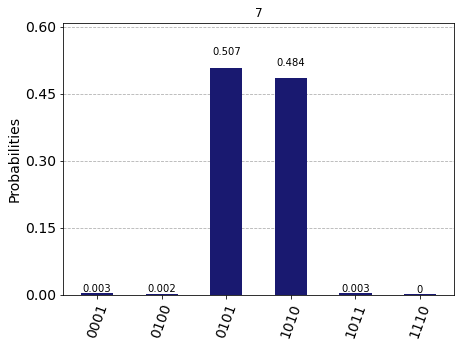

{'1010': 503, '0101': 512, '1110': 3, '0100': 1, '1011': 3, '0001': 2}


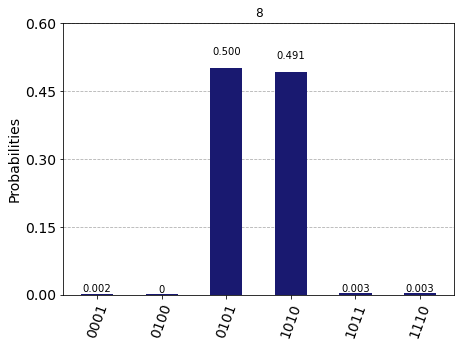

{'0101': 527, '1010': 495, '0100': 1, '1011': 1}


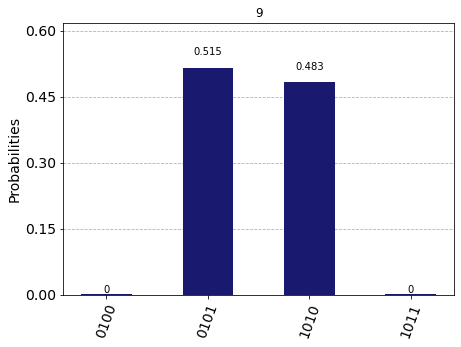

{'0101': 497, '1010': 525, '1110': 2}


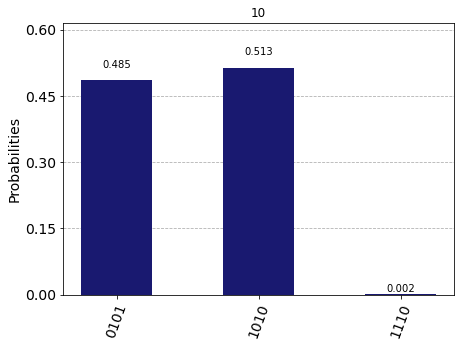

{'1010': 520, '0101': 504}


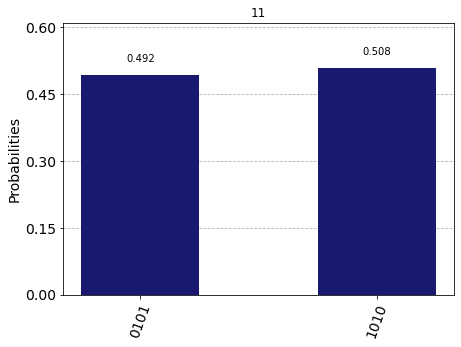

{'1010': 522, '0101': 502}


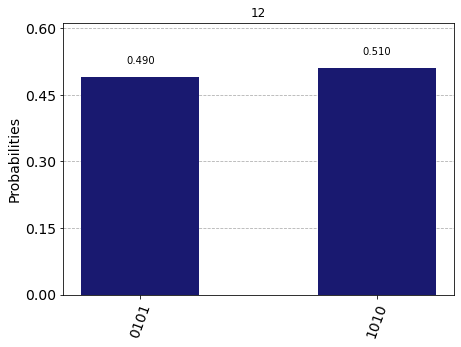

{'1010': 524, '0101': 500}


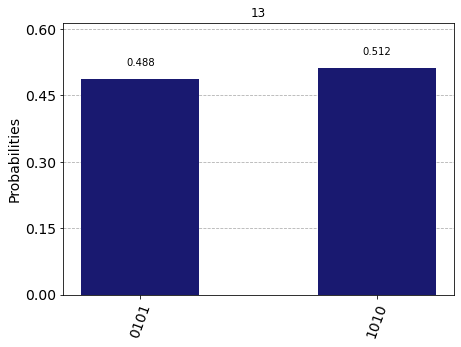

{'1010': 523, '0101': 501}


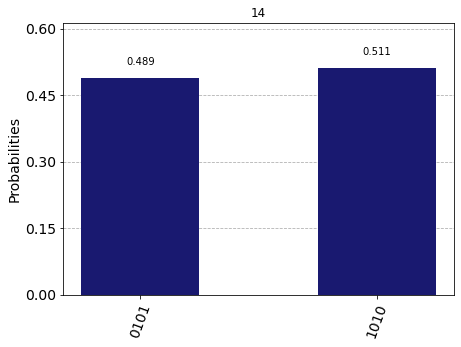

In [7]:
from qiskit.circuit.library.standard_gates import HGate
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    for i in range(a):
        #coin
        qc.barrier()
        qc.h((0,4))
        qc.barrier()
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    for i in range(a):
        #coin
        qc.barrier()
        qc.h((0,4))
        qc.barrier()
        qc.x((0,1,2,4,5,6))
        qc.mcx([0,1,2],3)
        qc.mcx([4,5,6],7)
        qc.x((0,1,2,4,5,6))
        qc.cx(3,1)
        qc.cx(7,5)
        qc.reset((3,7))
        qc.barrier()
        #在11時骰到家要先剪1
        qc.mcx([0,1,2],3)
        qc.mcx([4,5,6],7)
        qc.cx(3,1)
        qc.cx(7,5)
        qc.reset((3,7))
        qc.barrier()
        qc.barrier()
        qc.append(c3s_gate,[0,1,2])
        qc.append(c2s_gate,[0,1])
        qc.append(c3s_gate,[4,5,6])
        qc.append(c2s_gate,[4,5])
        qc.x((0,4))
        qc.append(c2sd_gate,[0,1])
        qc.append(c3sd_gate,[0,1,2])
        qc.append(c2sd_gate,[4,5])
        qc.append(c3sd_gate,[4,5,6])
    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(5,2)
    qc.measure(6,3)
    from qiskit.visualization import plot_histogram
    %matplotlib inline
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    print(job.result().get_counts())

    display(plot_histogram(job.result().get_counts(), color='midnightblue', title= a 
                    ))